<a href="https://colab.research.google.com/github/chodhitha03/GenAI_2303A52039/blob/main/2303A52039_GenAI_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1

 (1 ponto) Write Python code from scratch to find error metrics of deep learning model. Actual
 values and deep learning model predicted values are shown in Table 1. Also compare the results
 with the outcomes of libraries


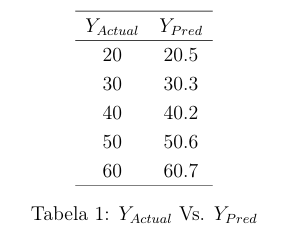



## Regression Metrices

In [ ]:
y=[10,20,30,40,50]
yp=[10.2,20.5,30.3,40.8,50.6]

## Without library

In [ ]:
sum=0
for i in range(len(y)):
    sum+=(y[i]-yp[i])**2
mean_square_error=sum/len(y)
print('the mean square error of the above data is: ',mean_square_error)

the mean square error of the above data is:  0.27599999999999947


In [ ]:
sum=0
for i in range(len(y)):
    sum+=abs(y[i]-yp[i])
mean_abs_error=sum/len(y)
print('the mean abs error of the above data is: ',mean_abs_error)

the mean abs error of the above data is:  0.4799999999999997


In [ ]:
print('the root mean error of the above data is: ',(mean_square_error**0.5))

the root mean error of the above data is:  0.5253570214625474


## with library

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
mse = mean_squared_error(y, yp)
print('The Mean Squared Error is:', mse)

The Mean Squared Error is: 0.27599999999999947


In [ ]:
mae = mean_absolute_error(y, yp)
print('The Mean Absolute Error is:', mae)

The Mean Absolute Error is: 0.4799999999999997


In [ ]:
rmse = mse**0.5  # RMSE is the square root of MSE
print('The Root Mean Squared Error is:', rmse)

The Root Mean Squared Error is: 0.5253570214625474


# Question 2

2. (1 ponto) Write python code from scratch to find evaluation metrics of deep learning model.
 Actual values and deep learning model predicted values are shown in Table 2. Also compare the
 results with outcome of libraries

 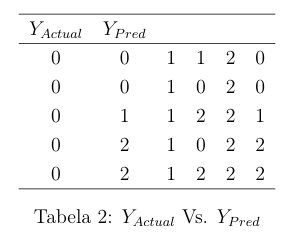

## Classification Metrices

In [ ]:
import numpy as np
yact=[0,0,0,0,0,1,1,1,1,1,1,2,2,2,2,2]
ypred=[0,0,1,1,2,2,0,1,1,1,2,0,2,1,1,2]

## Without library

In [ ]:
l=[]
for i in range(len(yact)):
    l.append([yact[i],ypred[i]])
print(l)

[[0, 0], [0, 0], [0, 1], [0, 1], [0, 2], [1, 2], [1, 0], [1, 1], [1, 1], [1, 1], [1, 2], [2, 0], [2, 2], [2, 1], [2, 1], [2, 2]]


In [ ]:
yact_set=list(sorted(set(yact)))
yact_set

[0, 1, 2]

In [ ]:
cm=[]
for i in yact_set:
  temp=[]
  for j in yact_set:
    temp.append(l.count([i,j]))
  cm.append(temp)

In [ ]:
print("confusionmatrix of above data is:\n",np.array(cm))

confusionmatrix of above data is:
 [[2 2 1]
 [1 3 2]
 [1 2 2]]


In [ ]:
import numpy as np

def calculate_precision_recall_f1(cm):
    total = sum(sum(row) for row in cm)
    num_classes = len(cm)
    precision = [0] * num_classes
    recall = [0] * num_classes
    f1_score = [0] * num_classes
    tp_mat = []
    fp_mat = []
    fn_mat = []
    tn_mat = []

    for i in range(num_classes):
        tp = cm[i][i]
        fp = 0
        for j in range(num_classes):
            if j != i:
                fp += cm[j][i]
        if tp + fp != 0:
            precision[i] = tp / (tp + fp)

        tp = cm[i][i]
        fn = 0
        for j in range(num_classes):
            if j != i:
                fn += cm[i][j]
        if tp + fn != 0:
            recall[i] = tp / (tp + fn)

        if precision[i] + recall[i] != 0:
            f1_score[i] = 2 * (precision[i] * recall[i]) / (precision[i] + recall[i])

        tp_mat.append(tp)
        fp_mat.append(fp)
        fn_mat.append(fn)
        tn_mat.append(total - tp - fp - fn)

    return precision, recall, f1_score, tp_mat, fp_mat, fn_mat, tn_mat, total

precision_values, recall_values, f1_values, tp_mat, fp_mat, fn_mat, tn_mat, total = calculate_precision_recall_f1(cm)

for i in range(len(precision_values)):
    print(f"Class {i} - Precision: {precision_values[i]}, Recall: {recall_values[i]}, F1-Score: {f1_values[i]}")

print(f"\nOverall Accuracy: {np.sum(tp_mat)/total}")
print(f"Overall Precision: {np.sum(tp_mat) / (np.sum(tp_mat) + np.sum(fp_mat))}")
print(f"Overall Recall: {np.sum(tp_mat) / (np.sum(tp_mat) + np.sum(fn_mat)):.4f}")
print(f"Overall F1-Score: {np.mean(f1_values)}")

Class 0 - Precision: 0.5, Recall: 0.4, F1-Score: 0.4444444444444445
Class 1 - Precision: 0.42857142857142855, Recall: 0.5, F1-Score: 0.4615384615384615
Class 2 - Precision: 0.4, Recall: 0.4, F1-Score: 0.4000000000000001

Overall Accuracy: 0.4375
Overall Precision: 0.4375
Overall Recall: 0.4375
Overall F1-Score: 0.43532763532763535


## with library

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

print("Confusion Matrix:\n", confusion_matrix(yact, ypred))

print("Classification Report:\n", classification_report(yact, ypred))

accuracy = accuracy_score(yact, ypred)
precision = precision_score(yact, ypred, average='weighted')
recall = recall_score(yact, ypred, average='weighted')
f1 = f1_score(yact, ypred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


Confusion Matrix:
 [[2 2 1]
 [1 3 2]
 [1 2 2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.40      0.44         5
           1       0.43      0.50      0.46         6
           2       0.40      0.40      0.40         5

    accuracy                           0.44        16
   macro avg       0.44      0.43      0.44        16
weighted avg       0.44      0.44      0.44        16

Accuracy: 0.4375
Precision: 0.4419642857142857
Recall: 0.4375
F1-Score: 0.43696581196581197
